In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import h5py
from netCDF4 import Dataset
import glob

import sqlite3

import matplotlib.pyplot as plt

/Users/sclayton/miniconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# import gridded particle positions

indir = '../data/particle_trajectories/'
mat = 'particle_for_SC.mat'
inmat = '%s%s'% (indir, mat)

part = h5py.File(inmat, 'r')
# part.keys()
# print np.array(part['parti']['x'])

In [3]:
# import model fields

files = glob.glob('../data/model_output/full*.cdf')

#for l in files:

day = 35
model = Dataset(files[day], mode='r')
temp = np.squeeze(model.variables['temp'])
print np.shape(temp)

xc = model.variables['xc'][:]
yc = model.variables['yc'][:]
# other variables: rho, s 
# model.close()

(66, 322, 258)


In [4]:
# import trajectory data

indir = '../data/particle_trajectories/'
db = 'particles_forward.db'
indb = '%s%s'% (indir, db)

conn = sqlite3.connect(indb)
c = conn.cursor()

xy = pd.read_sql_query("select ID, DOY, x, y, z, temperature from particles;", conn)
# print xy

conn.close()


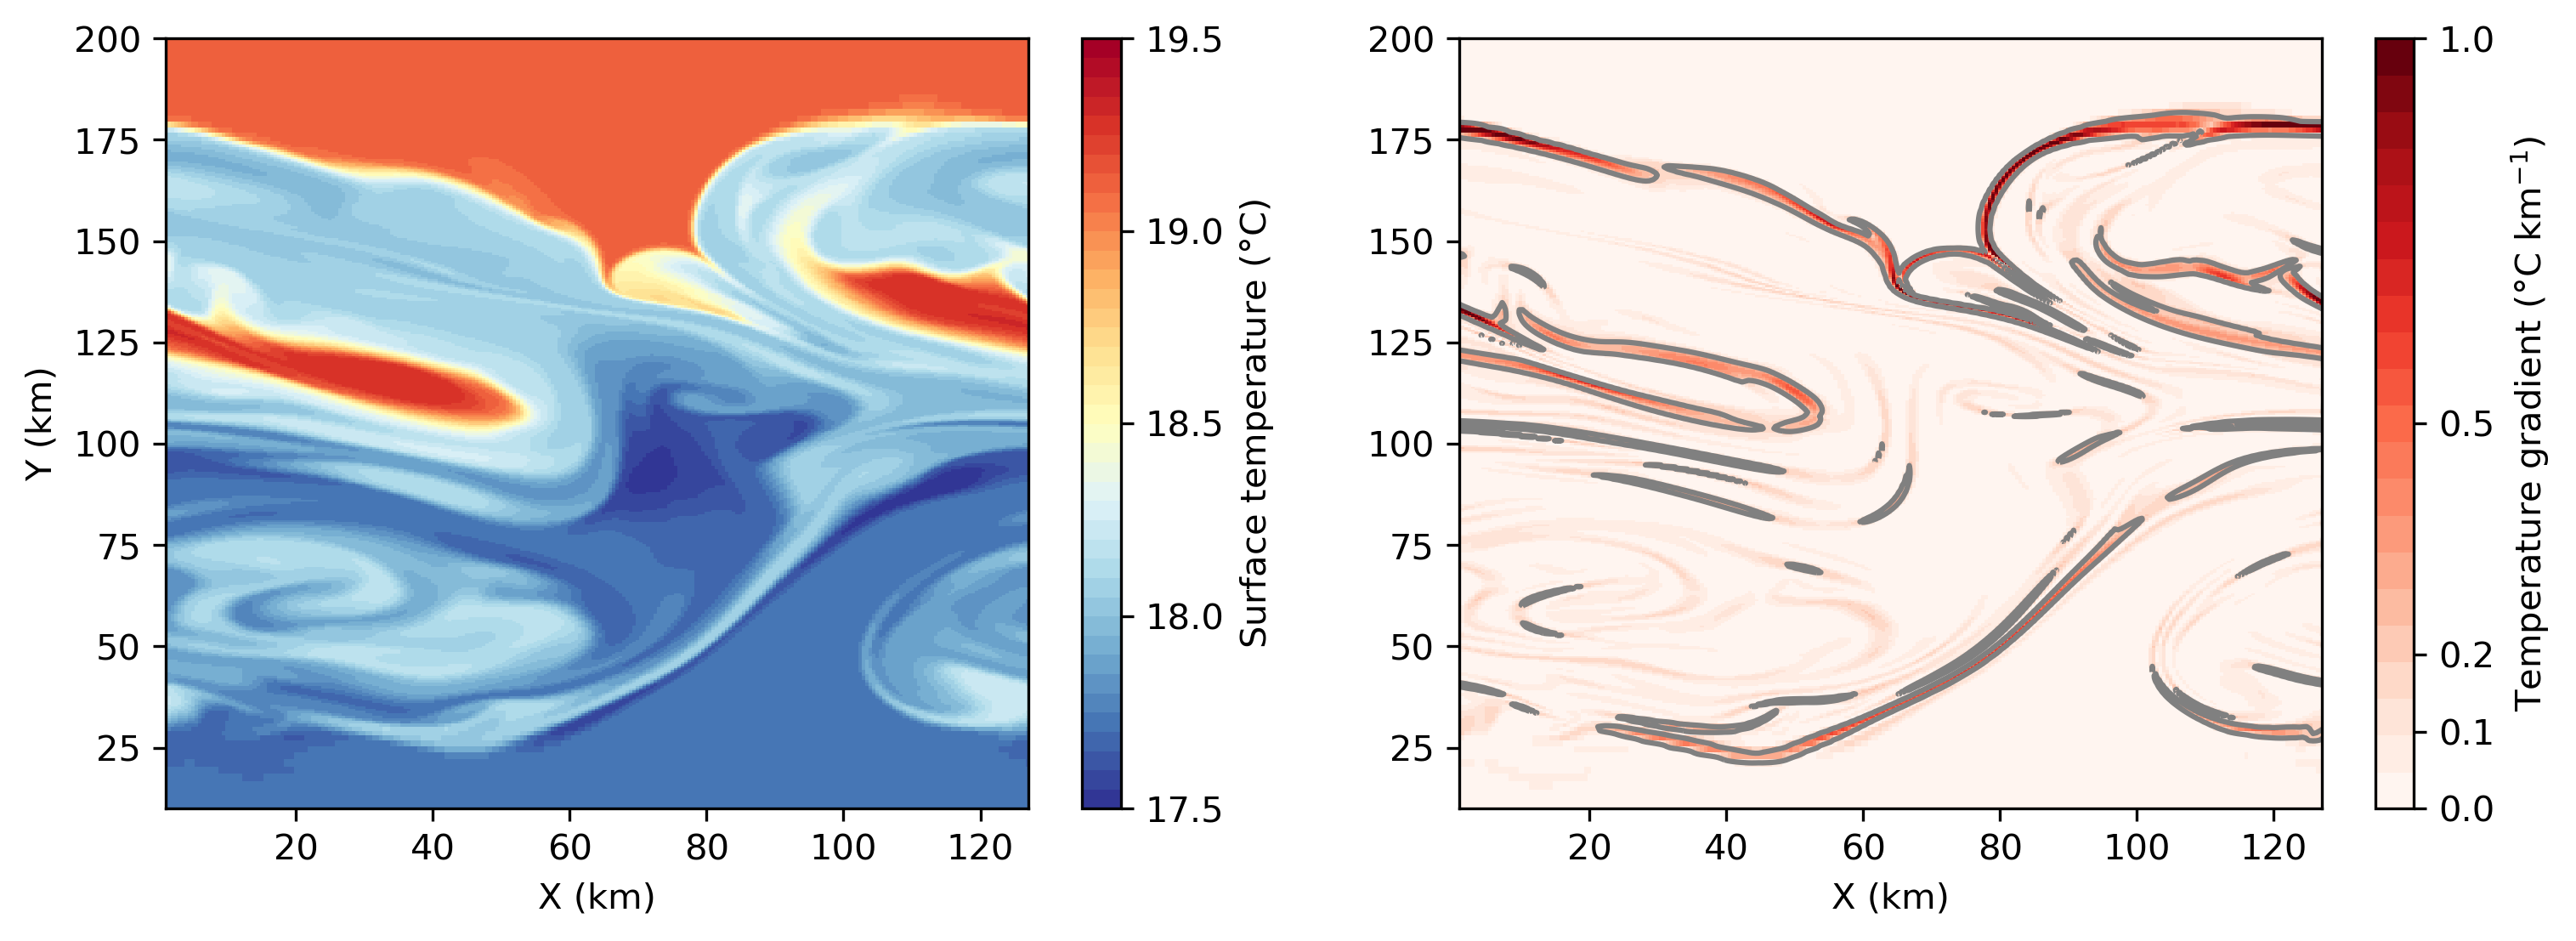

In [5]:
zl = 65

palette = plt.get_cmap('RdYlBu_r', 40)
palette2 = plt.get_cmap('Reds', 21)
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi = 300)

tt = ax1.pcolor(xc, yc, temp[zl,:,:], vmin = 17.5, vmax = 19.5, cmap = palette)
cb1 = plt.colorbar(tt, ax = ax1, ticks = [17.5, 18., 18.5, 19., 19.5], label='Surface temperature ($\degree$C)')
# ax1.set_title('Temperature')
ax1.set_ylim([10,200])
ax1.set_xlim([1, 254/2])
ax1.set_xlabel('X (km)')
ax1.set_ylabel('Y (km)')

tgrad = (np.abs(np.diff(temp[zl,:,:], n=1, axis =0))/0.5)[1:321, 1:257] + (np.abs(np.diff(temp[zl,:,:], n=1, axis =1))/0.5)[1:321, 1:257]

gg = ax2.pcolor(xc[1:257], yc[1:321], tgrad, vmin = 0, vmax =1, cmap = palette2)
ax2.contour(xc[1:257], yc[1:321], tgrad,[0.2], colors = 'gray')
cb2 = plt.colorbar(gg, ax = ax2, ticks = [0, 0.1, 0.2, 0.5, 1], label='Temperature gradient ($\degree$C km$^{-1}$)')
# ax2.set_title('Temperature Gradient')
ax2.set_ylim([10,200])
ax2.set_xlim([1, 254/2])
ax2.set_xlabel('X (km)')

plt.show()

# plt.pcolor(xc, yc, np.diff(temp[zl,:,:]/0.5, n=1, axis = 0), vmin = -0.25, vmax = 0.25)
# plt.colorbar()
# plt.show()

# cbar = fig.colorbar(cax, ticks=[-1, 0, 1], orientation='horizontal')
# cbar.ax.set_xticklabels(['Low', 'Medium', 'High']) 

/Users/sclayton/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


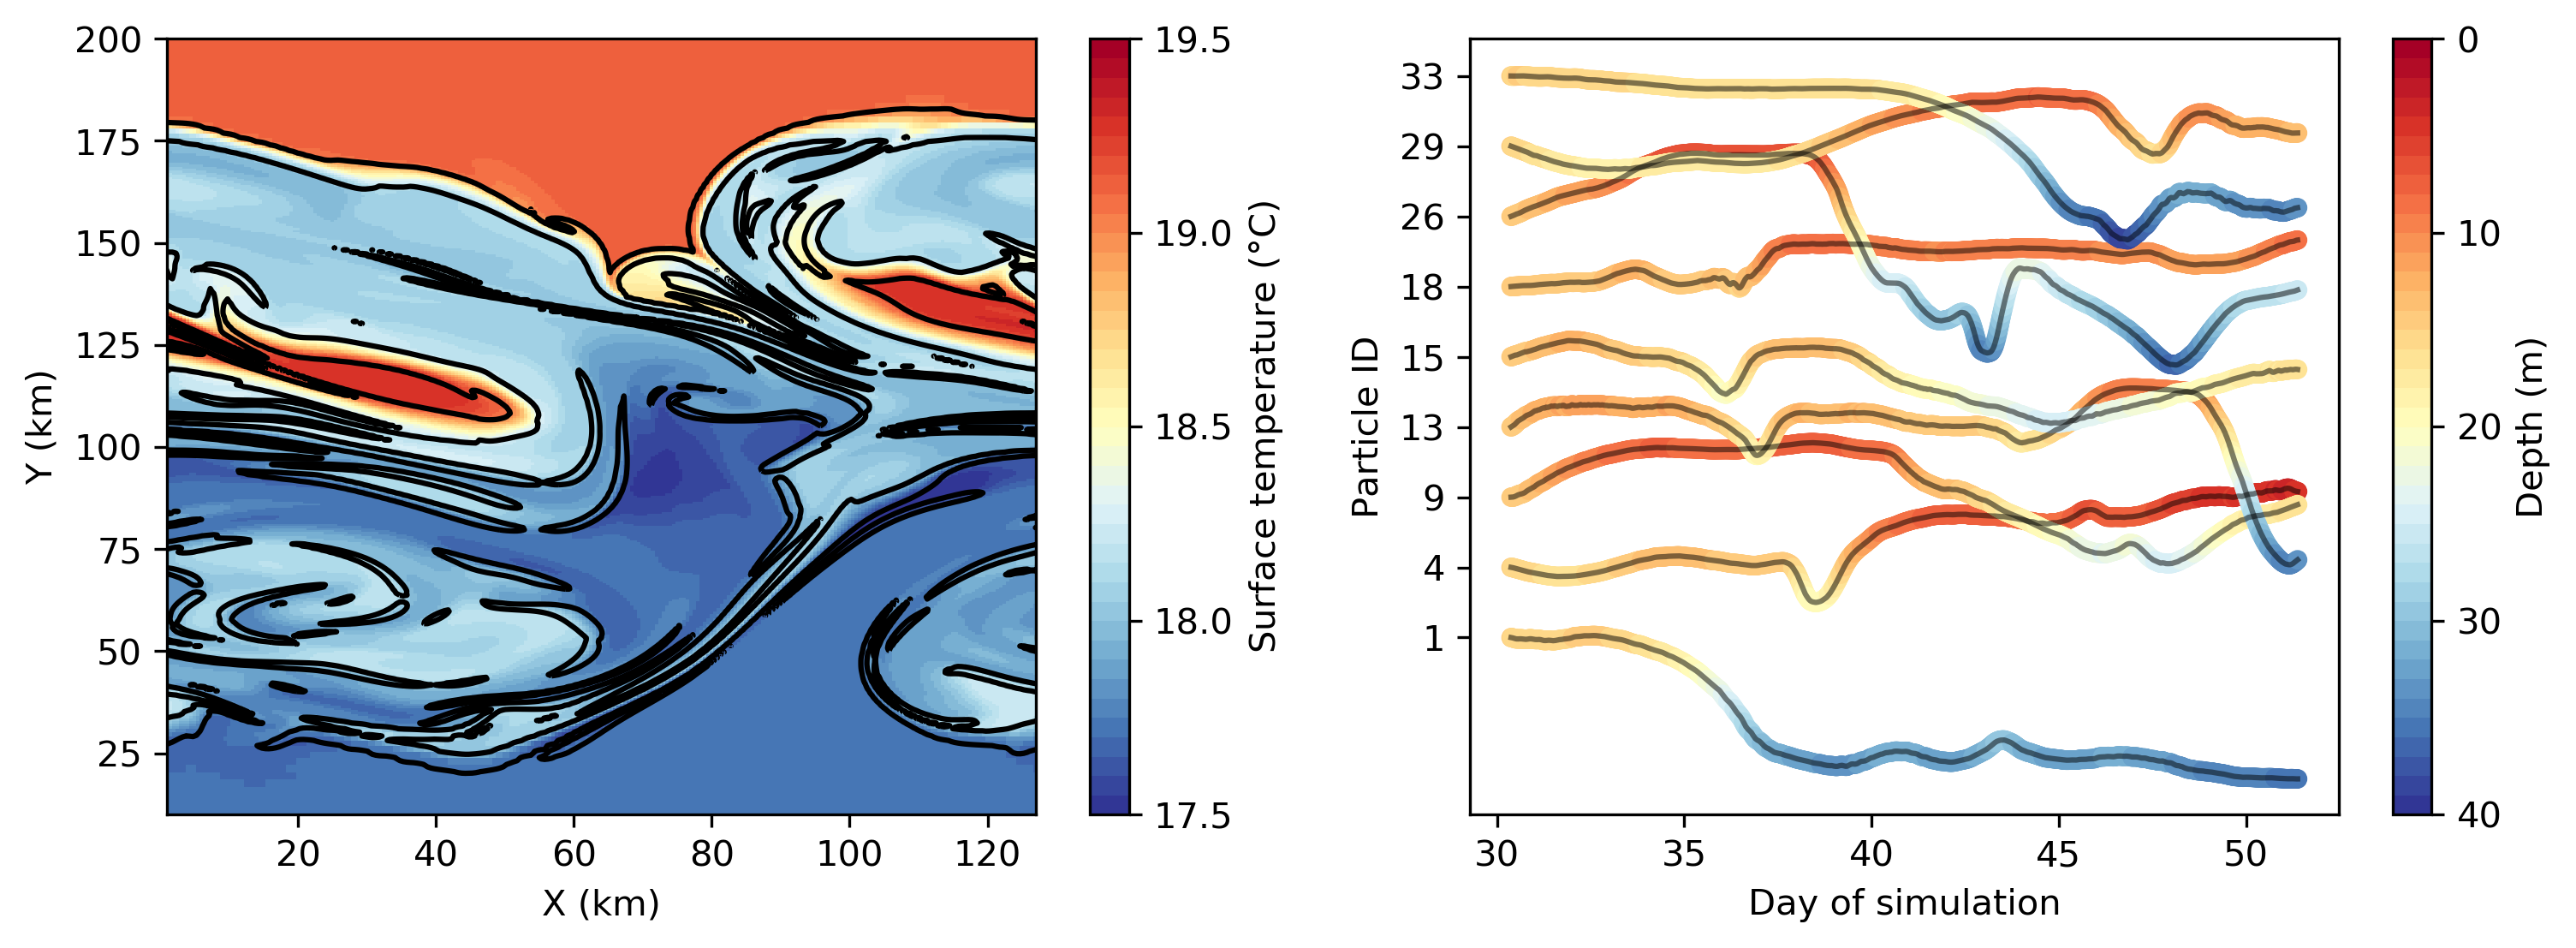

In [6]:
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi = 300)

tgrad = (np.abs(np.diff(temp[zl,:,:], n=1, axis =0))/0.5)[1:321, 1:257] + (np.abs(np.diff(temp[zl,:,:], n=1, axis =1))/0.5)[1:321, 1:257]

tt = ax1.pcolor(xc, yc, temp[zl,:,:], vmin = 17.5, vmax = 19.5, cmap = palette, alpha = 1)
cb1 = plt.colorbar(tt, ax = ax1, ticks = [17.5, 18., 18.5, 19., 19.5], label='Surface temperature ($\degree$C)')

ax1.contour(xc[1:257], yc[1:321], tgrad,[0.1], colors = 'k', lw = 1)

# ax1.set_title('Temperature')
ax1.set_ylim([10,200])
ax1.set_xlim([1, 254/2])
ax1.set_xlabel('X (km)')
ax1.set_ylabel('Y (km)')

nn = 0
for n in [1,4,9,13,15,18,26,29,33]:
    nn += 1
#     print nn
    subset = xy[xy['ID']==n].reset_index()
#     plt.scatter(subset['x'], subset['y'], s= 10, c = subset['temperature'], vmin = 16, vmax = 18)
    cc = ax2.plot(subset['DOY'],((subset['z']-subset['z'][0])/10)+nn, c = 'k', alpha = 0.5, zorder = 1)
    dd = ax2.scatter(subset['DOY'],((subset['z']-subset['z'][0])/10)+nn,s = 20, c = subset['z'], vmin = -40, vmax = 0, cmap = palette)

ax2.set_xlabel('Day of simulation')
ax2.set_yticks(range(1,10,1))#, 
ax2.set_yticklabels([1,4,9,13,15,18,26,29,33])
ax2.set_ylabel('Particle ID')
cb2 = plt.colorbar(dd, label = 'Depth (m)', ticks = [-40, -30, -20, -10, 0], ax = ax2)
cb2.set_ticklabels([40, 30, 20, 10, 0])


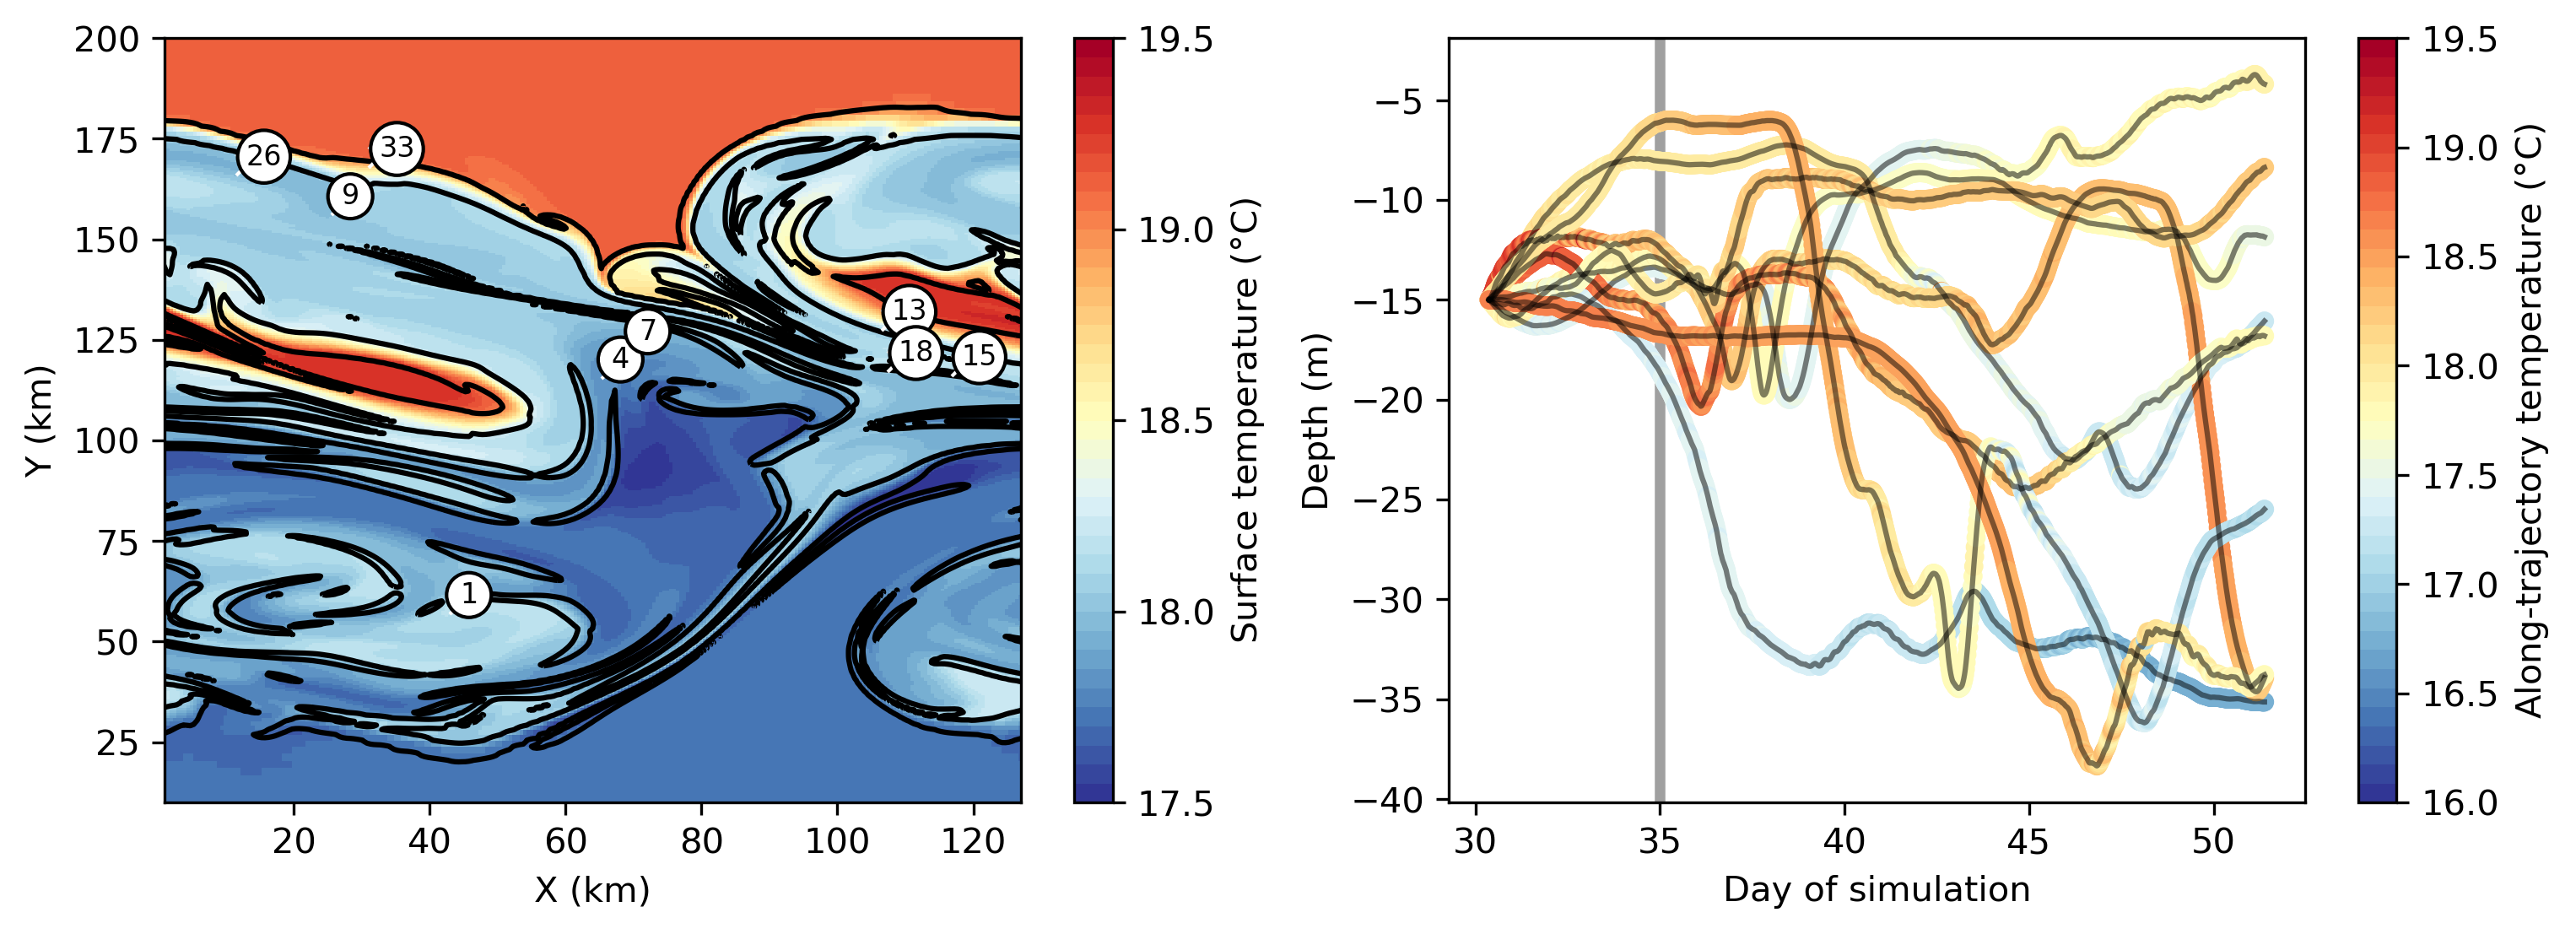

In [24]:
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi = 300)

tgrad = (np.abs(np.diff(temp[zl,:,:], n=1, axis =0))/0.5)[1:321, 1:257] + (np.abs(np.diff(temp[zl,:,:], n=1, axis =1))/0.5)[1:321, 1:257]

tt = ax1.pcolor(xc, yc, temp[zl,:,:], vmin = 17.5, vmax = 19.5, cmap = palette, alpha = 1)
cb1 = plt.colorbar(tt, ax = ax1, ticks = [17.5, 18., 18.5, 19., 19.5], label='Surface temperature ($\degree$C)')

ax1.contour(xc[1:257], yc[1:321], tgrad,[0.1], colors = 'k', lw = 1)

# ax1.set_title('Temperature')
ax1.set_ylim([10,200])
ax1.set_xlim([1, 254/2])
ax1.set_xlabel('X (km)')
ax1.set_ylabel('Y (km)')

nn = 0
bbox_props = dict(boxstyle="circle,pad=0.3", fc="w")

for n in [1,4,7, 9,13,15,18,26,33]:
    nn += 1
#     print nn
    subset = xy[xy['ID']==n].reset_index()
#     plt.scatter(subset['x'], subset['y'], s= 10, c = subset['temperature'], vmin = 16, vmax = 18)
#     cc = ax2.plot(subset['DOY'],((subset['z']-subset['z'][0])/10)+nn, c = 'k', alpha = 0.5, zorder = 1)
    cc = ax2.plot(subset['DOY'],subset['z'], c = 'k', alpha = 0.5, zorder = 1)
#     dd = ax2.scatter(subset['DOY'],((subset['z']-subset['z'][0])/10)+nn,s = 20, c = subset['temperature'], vmin = 16, vmax = 19.5, cmap = palette)
    dd = ax2.scatter(subset['DOY'],subset['z'],s = 20, c = subset['temperature'], vmin = 16, vmax = 19.5, cmap = palette)

    ds = subset[subset['DOY']==day]
#     print ds
    ax1.plot(ds['x']/1000, ds['y']/1000, 'xw', lw = 2)
    ax1.text(ds['x']/1000, ds['y']/1000, n, size = 8, bbox=bbox_props)
    
ax2.axvline(day, c='grey', lw =3, zorder = 0, alpha = 0.75)
ax2.set_xlabel('Day of simulation')
# ax2.set_yticks(range(1,10,1))#, 
# ax2.set_yticklabels([1,4,7, 9,13,15,18,26,33])
ax2.set_ylabel('Depth (m)')
cb2 = plt.colorbar(dd, label = 'Along-trajectory temperature ($\degree$C)', ticks = [16,16.5,17.,17.5, 18., 18.5, 19., 19.5], ax = ax2)
# cb2.set_ticklabels([40, 30, 20, 10, 0])


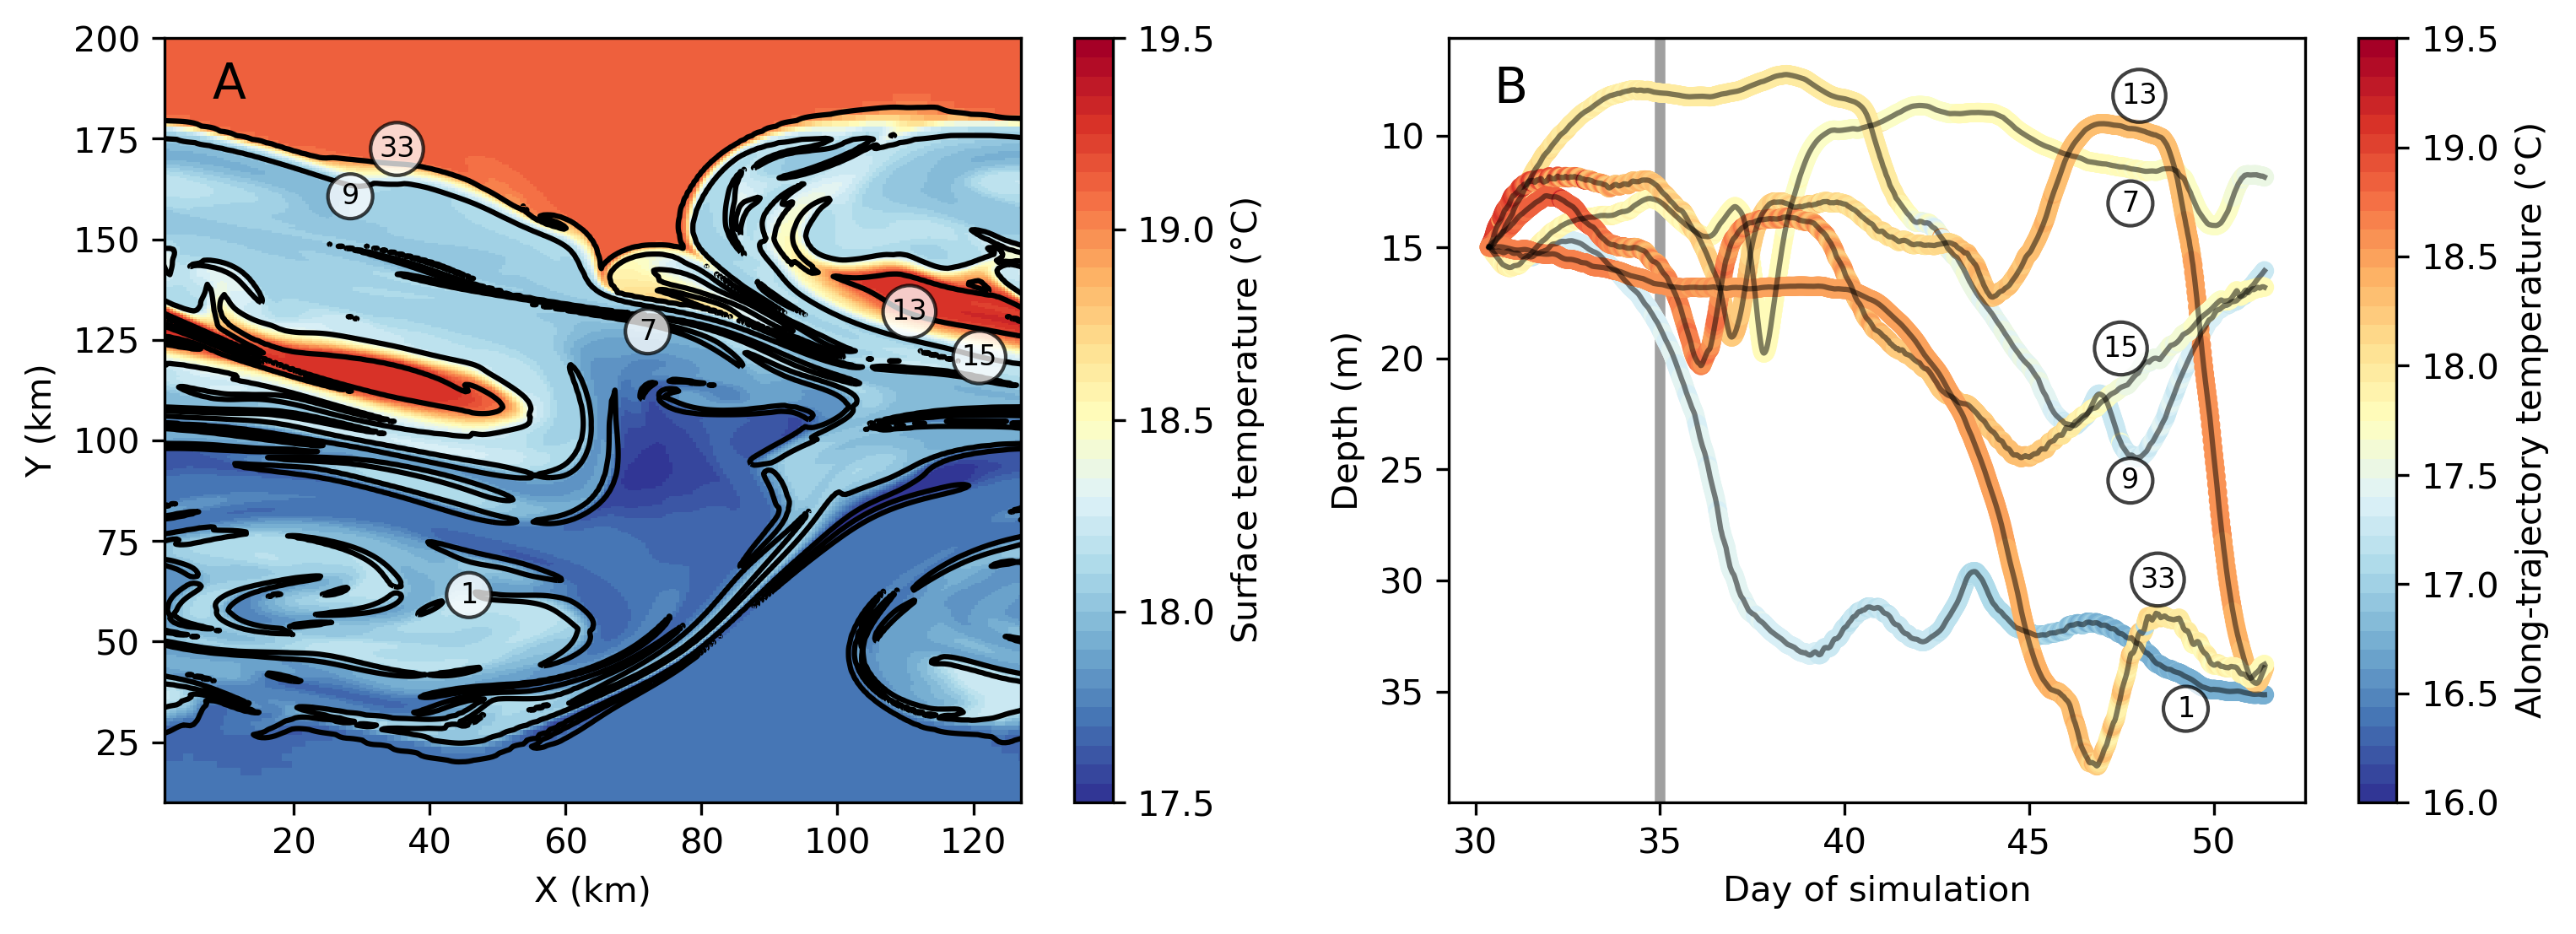

In [60]:
fig5, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi = 300)

tgrad = (np.abs(np.diff(temp[zl,:,:], n=1, axis =0))/0.5)[1:321, 1:257] + (np.abs(np.diff(temp[zl,:,:], n=1, axis =1))/0.5)[1:321, 1:257]

tt = ax1.pcolor(xc, yc, temp[zl,:,:], vmin = 17.5, vmax = 19.5, cmap = palette, alpha = 1)
cb1 = plt.colorbar(tt, ax = ax1, ticks = [17.5, 18., 18.5, 19., 19.5], label='Surface temperature ($\degree$C)')

ax1.contour(xc[1:257], yc[1:321], tgrad,[0.1], colors = 'k', lw = 1)

# ax1.set_title('Temperature')
ax1.set_ylim([10,200])
ax1.set_xlim([1, 254/2])
ax1.set_xlabel('X (km)')
ax1.set_ylabel('Y (km)')
ax1.text(8, 185, 'A', size = 14)

nn = 0
bbox_props = dict(boxstyle="circle,pad=0.3", fc="w", alpha = 0.75)

for n in [1,7, 9,13,15,33]:
    nn += 1
#     print nn
    subset = xy[xy['ID']==n].reset_index()
#     plt.scatter(subset['x'], subset['y'], s= 10, c = subset['temperature'], vmin = 16, vmax = 18)
#     cc = ax2.plot(subset['DOY'],((subset['z']-subset['z'][0])/10)+nn, c = 'k', alpha = 0.5, zorder = 1)
    cc = ax2.plot(subset['DOY'],subset['z'], c = 'k', alpha = 0.5, zorder = 1)
#     dd = ax2.scatter(subset['DOY'],((subset['z']-subset['z'][0])/10)+nn,s = 20, c = subset['temperature'], vmin = 16, vmax = 19.5, cmap = palette)
    dd = ax2.scatter(subset['DOY'],subset['z'],s = 20, c = subset['temperature'], vmin = 16, vmax = 19.5, cmap = palette)

    ds = subset[subset['DOY']==day]
    ax1.text(ds['x']/1000, ds['y']/1000, n, size = 8, bbox=bbox_props)
    
    dm = subset[subset['DOY']==47.5]
    if n ==9 or n ==7:
        dm = subset[subset['DOY']==47.5]
        ax2.text(dm['DOY'], dm['z']-2, n, size = 8, bbox=bbox_props)
    elif n == 13:
        dm = subset[subset['DOY']==47.5]
        ax2.text(dm['DOY'], dm['z']+1, n, size = 8, bbox=bbox_props)
    elif n ==1:
        dm = subset[subset['DOY']==49]
        ax2.text(dm['DOY'], dm['z']-2, n, size = 8, bbox=bbox_props)
    elif n == 33:
        dm = subset[subset['DOY']==48]
        ax2.text(dm['DOY'], dm['z']+2, n, size = 8, bbox=bbox_props)
    elif n == 15:
        dm = subset[subset['DOY']==47]
        ax2.text(dm['DOY'], dm['z']+2, n, size = 8, bbox=bbox_props)
     

ax2.text(30.5, -8.5, 'B', size = 14)
    
ax2.axvline(day, c='grey', lw =3, zorder = 0, alpha = 0.75)
ax2.set_xlabel('Day of simulation')
ax2.set_yticks([-35, -30, -25, -20, -15, -10])
ax2.set_yticklabels([35, 30, 25, 20, 15, 10])
ax2.set_ylabel('Depth (m)')
cb2 = plt.colorbar(dd, label = 'Along-trajectory temperature ($\degree$C)', ticks = [16,16.5,17.,17.5, 18., 18.5, 19., 19.5], ax = ax2)

fig5.savefig('../model_temp_traj.png', dpi = 300)